In [45]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Conv2D,  BatchNormalization, Add, Activation, MaxPooling2D, concatenate, Flatten, Dense, AveragePooling2D
from keras.optimizers import Adam
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential



import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split


In [46]:

# Path to the main flower dataset folder
dataset_folder = 'Fruits\Mango'


# List of class names
class_names = ['Anthracnose','Bacterial Canker','Cutting Weevil','Die Back','Gall Midge','Healthy','Powdery Mildew','Sooty Mould']



In [47]:
# Load and preprocess images
data = []
labels = []

for class_idx, class_name in enumerate(class_names):
    class_folder = os.path.join(dataset_folder, class_name)
    for img_file in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_file)
        img = Image.open(img_path)
        img = img.resize((32, 32))
        img_array = np.array(img)
        data.append(img_array)
        labels.append(class_idx)


In [48]:
# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split



In [49]:
# Split the data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)



In [50]:
# Print the shapes of the datasets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape", x_val.shape)
print("y_val shape :", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)



x_train shape: (2560, 32, 32, 3)
y_train shape: (2560,)
x_val shape (640, 32, 32, 3)
y_val shape : (640,)
x_test shape: (800, 32, 32, 3)
y_test shape: (800,)


In [51]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0
     

In [52]:
# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 8)
y_val = keras.utils.to_categorical(y_val, 8)
y_test = keras.utils.to_categorical(y_test, 8)
     

In [53]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)
early_stopping=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)

In [54]:
from tensorflow.keras import layers, Sequential
from keras import applications 
from tensorflow.keras.optimizers import SGD
from keras.layers  import Input
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten, Dense, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import Adam


In [55]:
#custom Model
customModel = Sequential()
customModel=Sequential(
    [
        layers.Conv2D(512,3,input_shape=(32,32,3),padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(256,3,padding='same',activation='relu'),
        layers.Conv2D(256,3,padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(128,3,padding='same',activation='relu'),
        layers.Conv2D(128,3,padding='same',activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.BatchNormalization(),        
        layers.MaxPooling2D(),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.BatchNormalization(),        
        layers.MaxPooling2D(),
        layers.Flatten(),

        layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(8,activation='softmax'),
    ]
)



In [56]:
customModel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [57]:
customModel.summary()
     

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 512)       14336     
                                                                 
 batch_normalization_10 (Ba  (None, 32, 32, 512)       2048      
 tchNormalization)                                               
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 512)       0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 256)       1179904   
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 256)       590080    
                                                                 
 batch_normalization_11 (Ba  (None, 16, 16, 256)      

In [58]:
y_train.shape

(2560, 8)

In [59]:
history = customModel.fit(
    x_train,y_train,
    epochs=35,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint,early_stopping])


Epoch 1/35
80/80 [==============================] - ETA: 0s - loss: 1.2078 - accuracy: 0.5262

c:\Users\VAIBHAV\PycharmProjects\pythonProject\venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


80/80 [==============================] - 87s 1s/step - loss: 1.2078 - accuracy: 0.5262 - val_loss: 2.5479 - val_accuracy: 0.1391
Epoch 2/35
80/80 [==============================] - ETA: 0s - loss: 0.6793 - accuracy: 0.7598WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 92s 1s/step - loss: 0.6793 - accuracy: 0.7598 - val_loss: 4.7977 - val_accuracy: 0.1406
Epoch 3/35
80/80 [==============================] - ETA: 0s - loss: 0.5928 - accuracy: 0.7969WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 100s 1s/step - loss: 0.5928 - accuracy: 0.7969 - val_loss: 6.4373 - val_accuracy: 0.1297
Epoch 4/35
80/80 [==============================] - ETA: 0s - loss: 0.4312 - accuracy: 0.8590WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 94s 1s/step - loss: 0.4312 - accuracy: 0.8590 - val_loss: 2.5784 - val_accuracy: 0.3453
Epoch 5/35
80/80 [==============================] - ETA: 0s - loss: 0.3495 - accuracy: 0.8824WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 92s 1s/step - loss: 0.3495 - accuracy: 0.8824 - val_loss: 6.3973 - val_accuracy: 0.1781
Epoch 6/35
80/80 [==============================] - ETA: 0s - loss: 0.3116 - accuracy: 0.8953WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 100s 1s/step - loss: 0.3116 - accuracy: 0.8953 - val_loss: 3.7643 - val_accuracy: 0.1922
Epoch 7/35
80/80 [==============================] - ETA: 0s - loss: 0.2980 - accuracy: 0.8996WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 100s 1s/step - loss: 0.2980 - accuracy: 0.8996 - val_loss: 0.8171 - val_accuracy: 0.7344
Epoch 8/35
80/80 [==============================] - ETA: 0s - loss: 0.2447 - accuracy: 0.9223WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 93s 1s/step - loss: 0.2447 - accuracy: 0.9223 - val_loss: 1.7993 - val_accuracy: 0.5484
Epoch 9/35
80/80 [==============================] - ETA: 0s - loss: 0.2070 - accuracy: 0.9344WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 89s 1s/step - loss: 0.2070 - accuracy: 0.9344 - val_loss: 0.3295 - val_accuracy: 0.8891
Epoch 10/35
80/80 [==============================] - ETA: 0s - loss: 0.2050 - accuracy: 0.9309WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 100s 1s/step - loss: 0.2050 - accuracy: 0.9309 - val_loss: 2.7735 - val_accuracy: 0.5453
Epoch 11/35
80/80 [==============================] - ETA: 0s - loss: 0.1859 - accuracy: 0.9406WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 97s 1s/step - loss: 0.1859 - accuracy: 0.9406 - val_loss: 2.2636 - val_accuracy: 0.5469
Epoch 12/35
80/80 [==============================] - ETA: 0s - loss: 0.1273 - accuracy: 0.9594WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 76s 957ms/step - loss: 0.1273 - accuracy: 0.9594 - val_loss: 0.6971 - val_accuracy: 0.8203
Epoch 13/35
80/80 [==============================] - ETA: 0s - loss: 0.1443 - accuracy: 0.9547WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 78s 982ms/step - loss: 0.1443 - accuracy: 0.9547 - val_loss: 0.3336 - val_accuracy: 0.8797
Epoch 14/35
80/80 [==============================] - ETA: 0s - loss: 0.1575 - accuracy: 0.9480WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 77s 962ms/step - loss: 0.1575 - accuracy: 0.9480 - val_loss: 0.4890 - val_accuracy: 0.8453
Epoch 15/35
80/80 [==============================] - ETA: 0s - loss: 0.1388 - accuracy: 0.9551WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 83s 1s/step - loss: 0.1388 - accuracy: 0.9551 - val_loss: 1.2887 - val_accuracy: 0.7234
Epoch 16/35
80/80 [==============================] - ETA: 0s - loss: 0.1256 - accuracy: 0.9598WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 84s 1s/step - loss: 0.1256 - accuracy: 0.9598 - val_loss: 0.4350 - val_accuracy: 0.8859
Epoch 17/35
80/80 [==============================] - ETA: 0s - loss: 0.1142 - accuracy: 0.9660WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 90s 1s/step - loss: 0.1142 - accuracy: 0.9660 - val_loss: 1.9302 - val_accuracy: 0.6109
Epoch 18/35
80/80 [==============================] - ETA: 0s - loss: 0.0878 - accuracy: 0.9688WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 88s 1s/step - loss: 0.0878 - accuracy: 0.9688 - val_loss: 0.5510 - val_accuracy: 0.8469
Epoch 19/35
80/80 [==============================] - ETA: 0s - loss: 0.1505 - accuracy: 0.9543WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 92s 1s/step - loss: 0.1505 - accuracy: 0.9543 - val_loss: 2.1046 - val_accuracy: 0.5453
Epoch 20/35
80/80 [==============================] - ETA: 0s - loss: 0.1469 - accuracy: 0.9551WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 91s 1s/step - loss: 0.1469 - accuracy: 0.9551 - val_loss: 0.3814 - val_accuracy: 0.8844
Epoch 21/35
80/80 [==============================] - ETA: 0s - loss: 0.0885 - accuracy: 0.9750WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 95s 1s/step - loss: 0.0885 - accuracy: 0.9750 - val_loss: 0.7747 - val_accuracy: 0.7703
Epoch 22/35
80/80 [==============================] - ETA: 0s - loss: 0.0804 - accuracy: 0.9746WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 92s 1s/step - loss: 0.0804 - accuracy: 0.9746 - val_loss: 0.7720 - val_accuracy: 0.8234
Epoch 23/35
80/80 [==============================] - ETA: 0s - loss: 0.1293 - accuracy: 0.9602WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 94s 1s/step - loss: 0.1293 - accuracy: 0.9602 - val_loss: 0.2834 - val_accuracy: 0.9266
Epoch 24/35
80/80 [==============================] - ETA: 0s - loss: 0.0962 - accuracy: 0.9707WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 86s 1s/step - loss: 0.0962 - accuracy: 0.9707 - val_loss: 1.7663 - val_accuracy: 0.6234
Epoch 25/35
80/80 [==============================] - ETA: 0s - loss: 0.0996 - accuracy: 0.9703WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 98s 1s/step - loss: 0.0996 - accuracy: 0.9703 - val_loss: 1.4533 - val_accuracy: 0.6672
Epoch 26/35
80/80 [==============================] - ETA: 0s - loss: 0.0590 - accuracy: 0.9809WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 101s 1s/step - loss: 0.0590 - accuracy: 0.9809 - val_loss: 0.4276 - val_accuracy: 0.8828
Epoch 27/35
80/80 [==============================] - ETA: 0s - loss: 0.1424 - accuracy: 0.9586WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 89s 1s/step - loss: 0.1424 - accuracy: 0.9586 - val_loss: 0.3936 - val_accuracy: 0.8750
Epoch 28/35
80/80 [==============================] - ETA: 0s - loss: 0.1163 - accuracy: 0.9711WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 87s 1s/step - loss: 0.1163 - accuracy: 0.9711 - val_loss: 0.4198 - val_accuracy: 0.8875
Epoch 29/35
80/80 [==============================] - ETA: 0s - loss: 0.0687 - accuracy: 0.9789WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 87s 1s/step - loss: 0.0687 - accuracy: 0.9789 - val_loss: 4.6527 - val_accuracy: 0.3906
Epoch 30/35
80/80 [==============================] - ETA: 0s - loss: 0.1205 - accuracy: 0.9633WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 89s 1s/step - loss: 0.1205 - accuracy: 0.9633 - val_loss: 0.3729 - val_accuracy: 0.8813
Epoch 31/35
80/80 [==============================] - ETA: 0s - loss: 0.0620 - accuracy: 0.9809WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 88s 1s/step - loss: 0.0620 - accuracy: 0.9809 - val_loss: 0.7092 - val_accuracy: 0.8078
Epoch 32/35
80/80 [==============================] - ETA: 0s - loss: 0.0637 - accuracy: 0.9820WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 89s 1s/step - loss: 0.0637 - accuracy: 0.9820 - val_loss: 1.6161 - val_accuracy: 0.6422
Epoch 33/35
80/80 [==============================] - ETA: 0s - loss: 0.0653 - accuracy: 0.9824WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 88s 1s/step - loss: 0.0653 - accuracy: 0.9824 - val_loss: 0.5914 - val_accuracy: 0.8578
Epoch 34/35
80/80 [==============================] - ETA: 0s - loss: 0.0728 - accuracy: 0.9812WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 84s 1s/step - loss: 0.0728 - accuracy: 0.9812 - val_loss: 3.0424 - val_accuracy: 0.4516
Epoch 35/35
80/80 [==============================] - ETA: 0s - loss: 0.0569 - accuracy: 0.9855WARNING:tensorflow:Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy


80/80 [==============================] - 84s 1s/step - loss: 0.0569 - accuracy: 0.9855 - val_loss: 0.3234 - val_accuracy: 0.9156


In [60]:
val_loss, val_acc = customModel.evaluate(x_val,y_val)
print('Validation accuracy : ', val_acc)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

20/20 [==============================] - 6s 276ms/step - loss: 0.3234 - accuracy: 0.9156
Validation accuracy :  0.9156249761581421


In [ ]:
import matplotlib.pyplot as plt

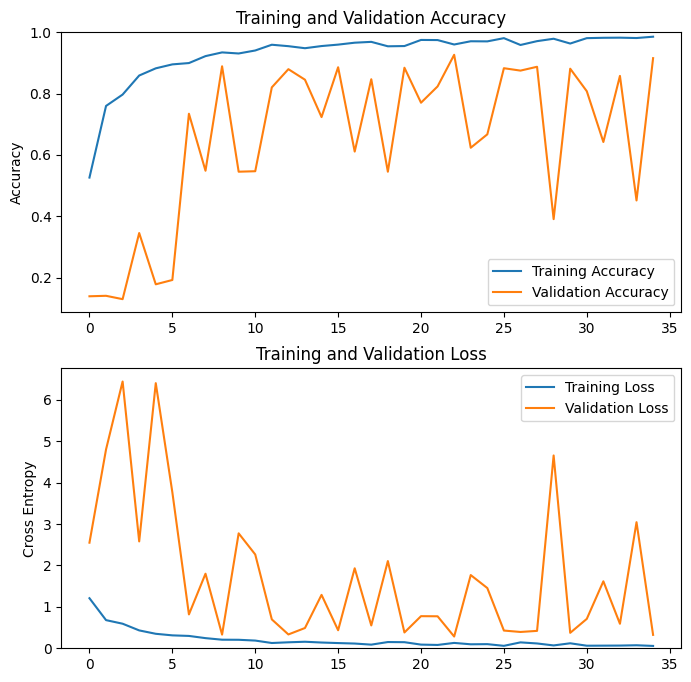

In [62]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()




In [63]:
import pandas as pd
import seaborn as sns

20/20 [==============================] - 5s 256ms/step


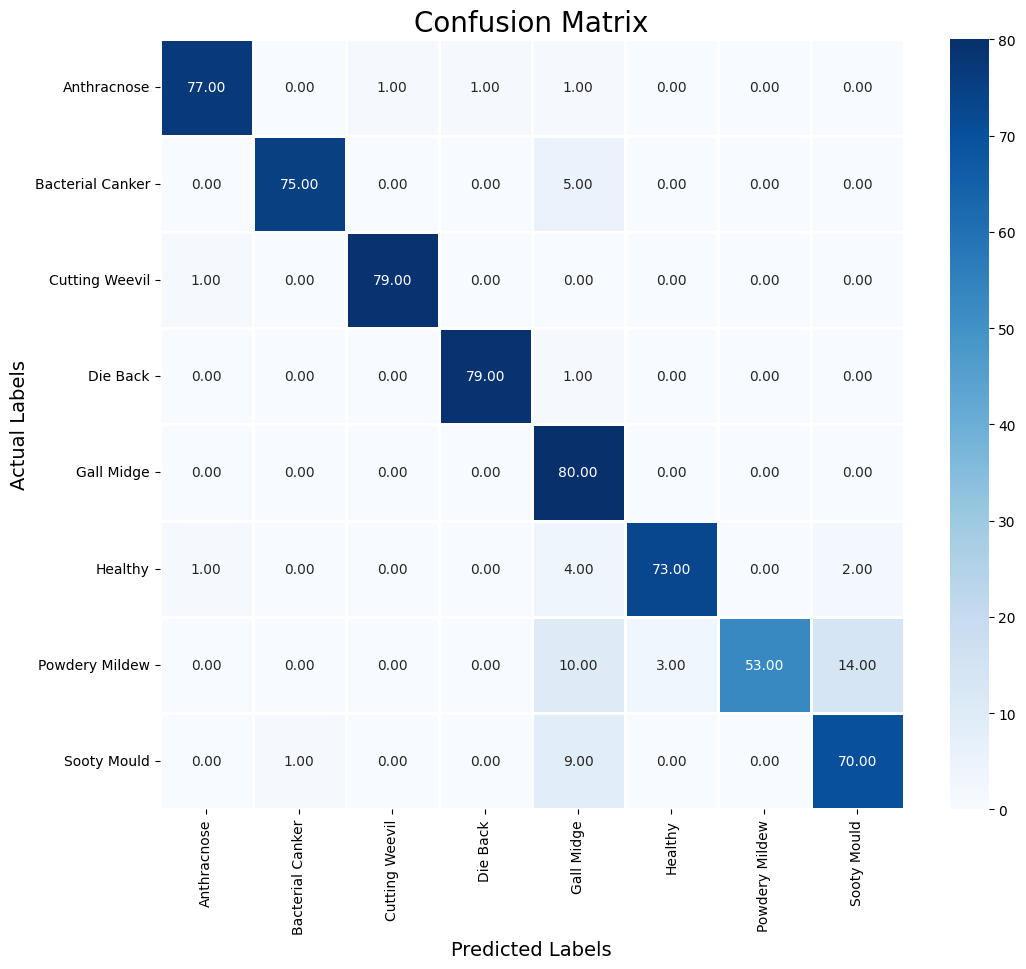

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        80
           1       0.99      0.94      0.96        80
           2       0.99      0.99      0.99        80
           3       0.99      0.99      0.99        80
           4       0.73      1.00      0.84        80
           5       0.96      0.91      0.94        80
           6       1.00      0.66      0.80        80
           7       0.81      0.88      0.84        80

    accuracy                           0.92       640
   macro avg       0.93      0.92      0.92       640
weighted avg       0.93      0.92      0.92       640



In [64]:
from sklearn.metrics import confusion_matrix,classification_report
valid_pres=customModel.predict(x_val)
valid_pred = [np.argmax(pred) for pred in valid_pres]
y_val = np.argmax(y_val, axis=1)
cm =confusion_matrix(y_val,valid_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in class_names] , columns = [i for i in class_names])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_val,valid_pred))



In [65]:
score = customModel.evaluate(x_test, y_test)

25/25 [==============================] - 7s 286ms/step - loss: 0.3282 - accuracy: 0.9237


In [66]:
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.32822373509407043
Test accuracy: 0.9237499833106995


In [67]:
customModel.save('Mango_Saved_Model')

INFO:tensorflow:Assets written to: Mango_Saved_Model\assets


INFO:tensorflow:Assets written to: Mango_Saved_Model\assets


In [68]:
import tensorflow as tf
import numpy as np
from PIL import Image
import tensorflow as tf
model = tf.keras.models.load_model('Mango_Saved_Model')




In [69]:
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((32, 32))
    
    # Convert to RGB in case the image has an alpha channel
    img = img.convert('RGB')
    
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [70]:
# List of class names
class_names = ['Anthracnose','Bacterial Canker','Cutting Weevil','Die Back','Gall Midge','Healthy','Powdery Mildew','Sooty Mould']


In [71]:
# Predict the class
image_path = 'flowers/rose/12240303_80d87f77a3_n.jpg'
input_image = preprocess_image(image_path)
predictions = model.predict(input_image)

predicted_class = np.argmax(predictions)
predicted_class_name = class_names[predicted_class]

print("Predicted class:", predicted_class_name)


FileNotFoundError: [Errno 2] No such file or directory: 'flowers/rose/12240303_80d87f77a3_n.jpg'